In [1]:
# 必要なパッケージをインポート
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import japanize_matplotlib
from pathlib import Path
# import tqdm
import random
import itertools

random.seed(7)

In [2]:
# 乱数でデータフレーム作成
def create_df():
    random.seed(7)

    data_num = 1500
    rl1 = ["zero", "one", "two", "three", "four"]
    rl2 = ["a", "b", "c", "d", "e"]
    rl3 = ["あ", "い", "う", "え", "お"]

    value1 = random.choices(rl1, k=data_num)
    value2 = random.choices(rl2, k=data_num)
    value3 = random.choices(rl3, k=data_num)
    value4 = [random.randrange(100, 200, 2) for i in range(data_num)]
    value5 = [random.randrange(500, 1000, 10) for i in range(data_num)]

    dict_test = dict(col1=value1, col2=value2, col3=value3, col4=value4, col5=value5)
    df = pd.DataFrame(data=dict_test)
    return df

display(create_df().head(5))

,col1,col2,col3,col4,col5
0,one,e,い,178,910
1,zero,a,い,140,560
2,three,d,あ,140,550
3,zero,d,あ,122,890
4,two,a,お,192,890


In [3]:
# 件数確認
df = create_df()

col_li = ["col1", "col2", "col3"]
col1 = "col1"
col2 = "col2"
to_remove = [col1, col2]
col3 = [i for i in col_li if i not in to_remove]

concat_col = f"{col1}_{col2}"
df[concat_col] = df[col1] + df[col2]
df_agg = (
    pd.DataFrame(
    pd.DataFrame(df.groupby(concat_col).count())
    .rename(columns={col1:"取引回数"})
    .sort_values(by="取引回数", ascending=False)
    ["取引回数"]
    )
)

print("=====")
print(f"【固定カラム:{col1}, {col2}   比較カラム:{col3}】")
print(f"組み合わせ数: {len(df_agg)}パターン")
display(df_agg.head(10))

=====
【固定カラム:col1, col2   比較カラム:['col3']】
組み合わせ数: 25パターン


,取引回数
col1_col2,
oneb,73
foura,68
zeroa,68
onea,67
twoc,64
zeroc,64
threea,63
threee,63
zerob,63


In [4]:
# 繰り返し処理して件数確認
df = create_df()

# 組み合わせパターンを見たいカラムを作成
col_li = ["col1", "col2", "col3"]

# イテレータで全パターンのペアを生成
for pair in itertools.combinations(col_li, 2):

    # 固定したいカラムを選択
    pair_li = list(pair)
    col1 = pair_li[0]    
    col2 = pair_li[1]

    # 比較したいカラムを選択
    to_remove = [col1, col2]
    col3 = [i for i in col_li if i not in to_remove]

    # 件数出力ロジック
    concat_col = f"{col1}_{col2}"
    df[concat_col] = df[col1] + df[col2] # 固定したカラムを連結
    df_agg = (
        pd.DataFrame(
        pd.DataFrame(df.groupby(concat_col).count())
        .rename(columns={col1:"件数"})
        .sort_values(by="件数", ascending=False)
        ["件数"]
        )
    )

    # 表示
    print("=====")
    print(f"【固定カラム:{col1}, {col2}   比較カラム:{col3}】")
    print(f"組み合わせ数: {len(df_agg)}パターン")
    display(df_agg.head(10))

=====
【固定カラム:col1, col2   比較カラム:['col3']】
組み合わせ数: 25パターン


,件数
col1_col2,
oneb,73
foura,68
zeroa,68
onea,67
twoc,64
zeroc,64
threea,63
threee,63
zerob,63


=====
【固定カラム:col1, col3   比較カラム:['col2']】
組み合わせ数: 25パターン


,件数
col1_col3,
oneお,75
zeroえ,70
fourえ,69
threeあ,68
oneえ,66
twoい,66
zeroお,66
oneい,65
fourあ,65


=====
【固定カラム:col2, col3   比較カラム:['col1']】
組み合わせ数: 25パターン


,件数
col2_col3,
aい,69
bあ,69
aえ,69
eあ,67
cえ,66
bう,64
eお,64
aお,63
aあ,62


,col1,col2,col3,col4,col5,col1_col2
0,one,e,い,178,910,onee
1,zero,a,い,140,560,zeroa
2,three,d,あ,140,550,threed
3,zero,d,あ,122,890,zerod
4,two,a,お,192,890,twoa


,件数
col1_col2,
oneb,73
foura,68
zeroa,68
onea,67
twoc,64


組み合わせの数:25パターン


/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


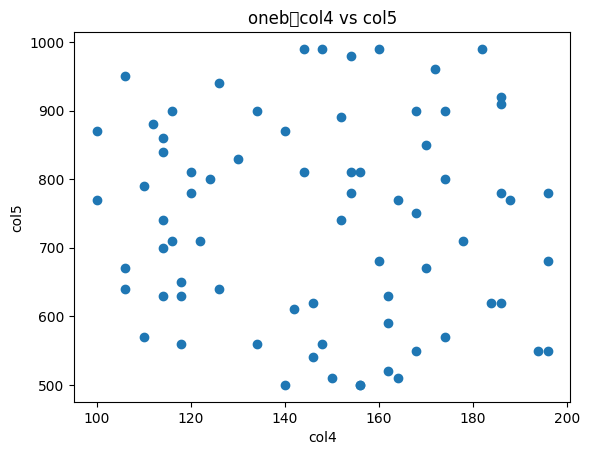

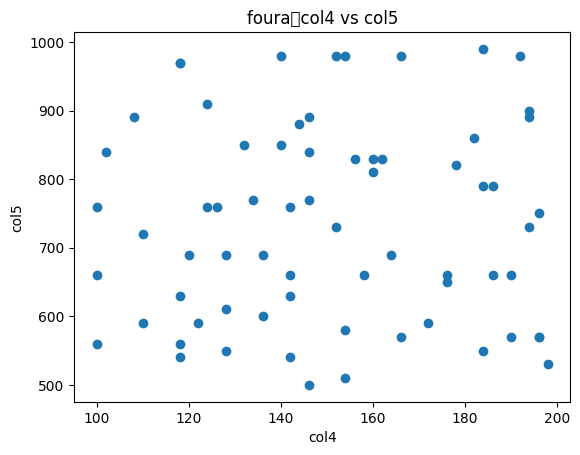

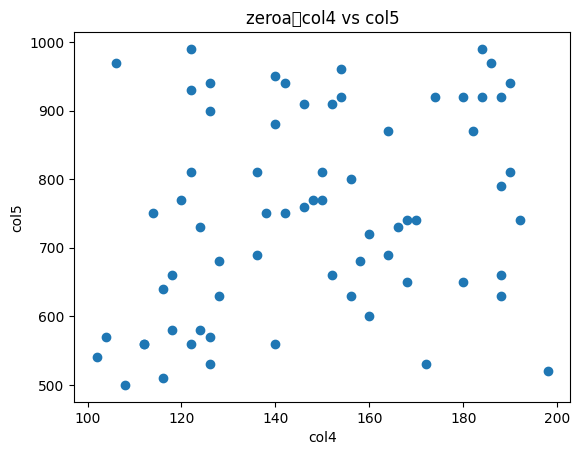

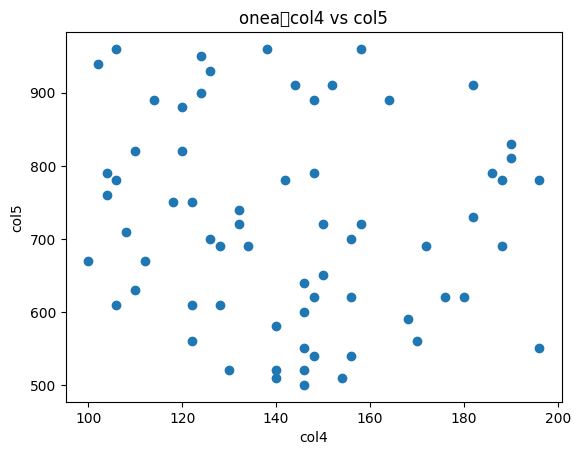

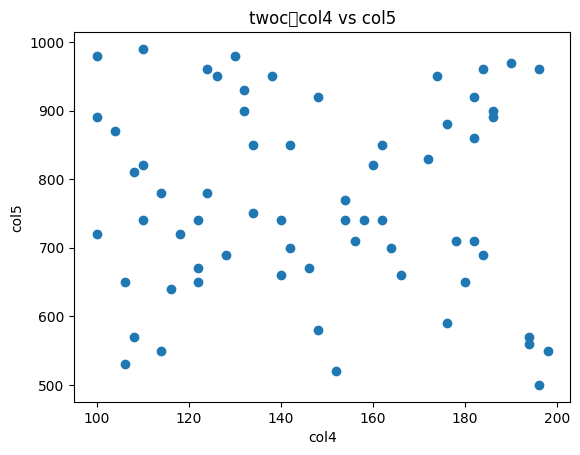

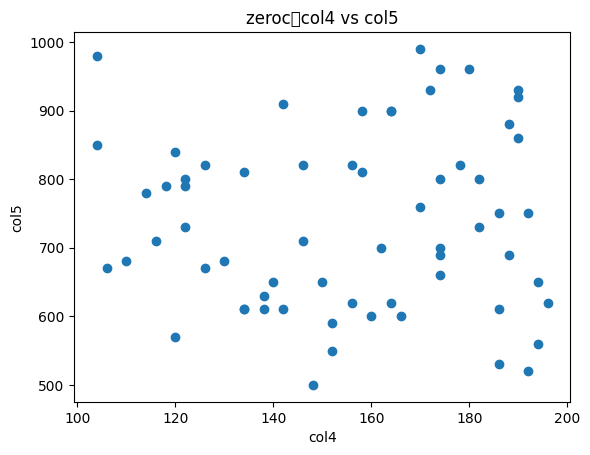

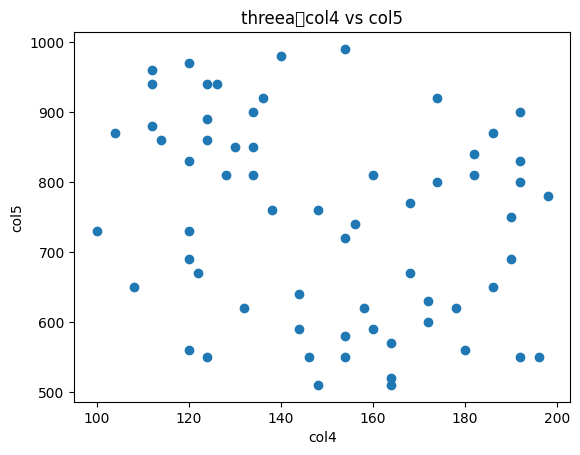

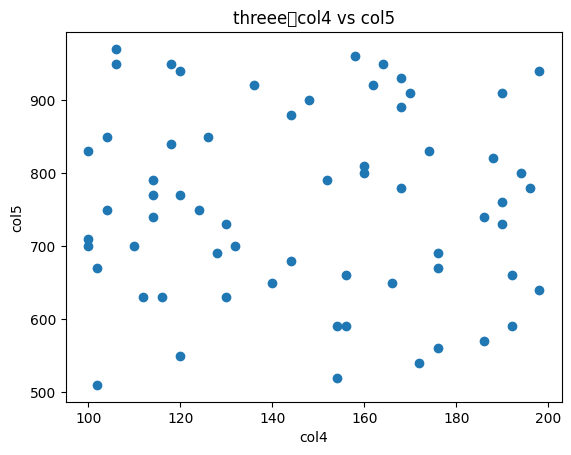

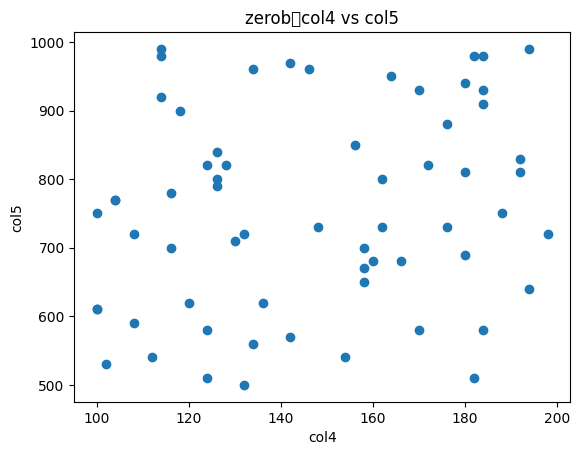

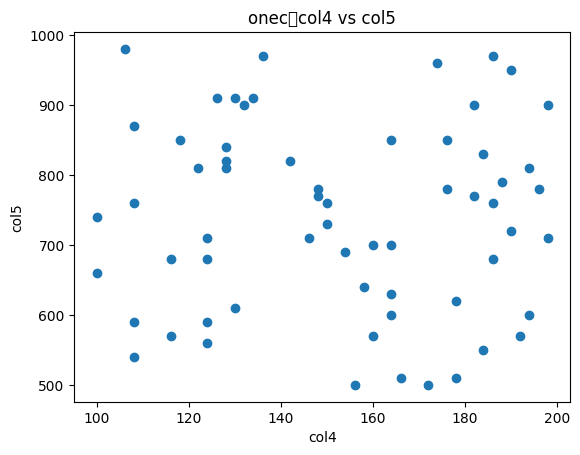

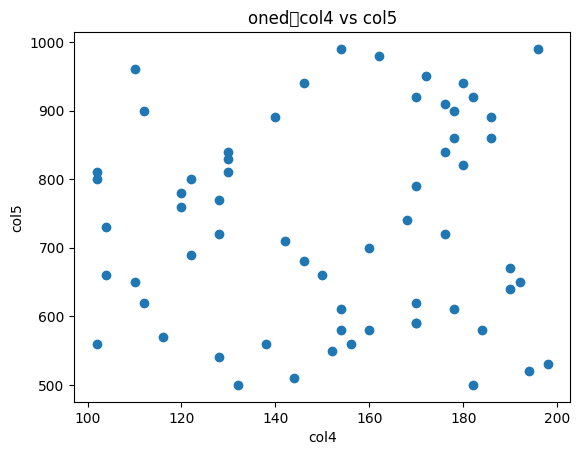

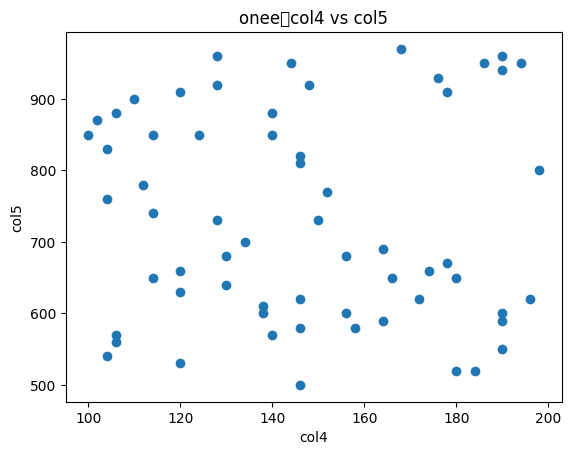

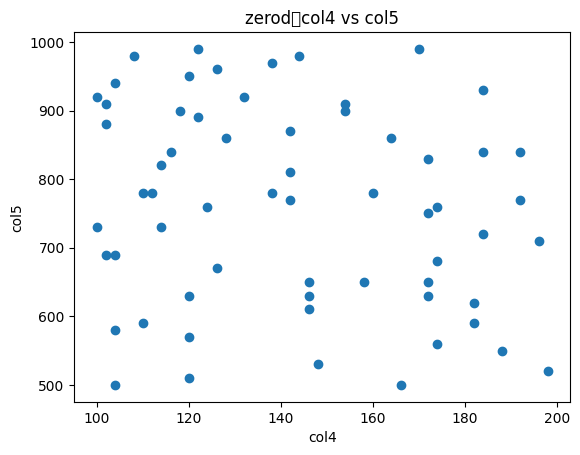

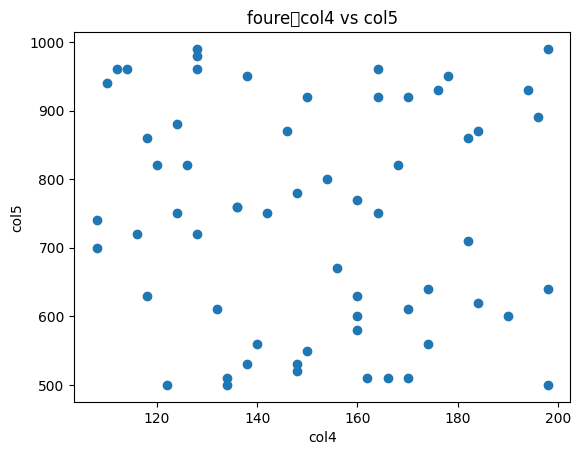

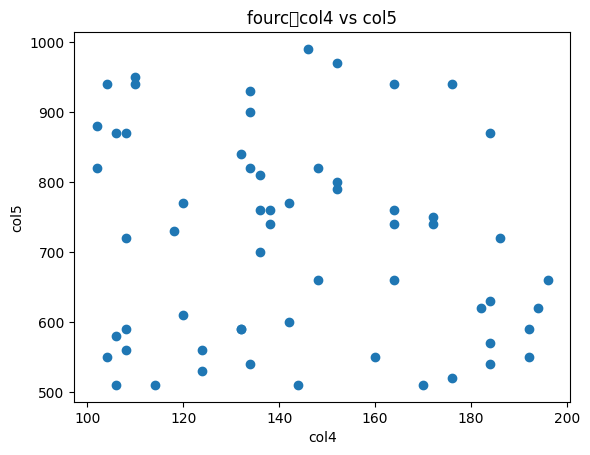

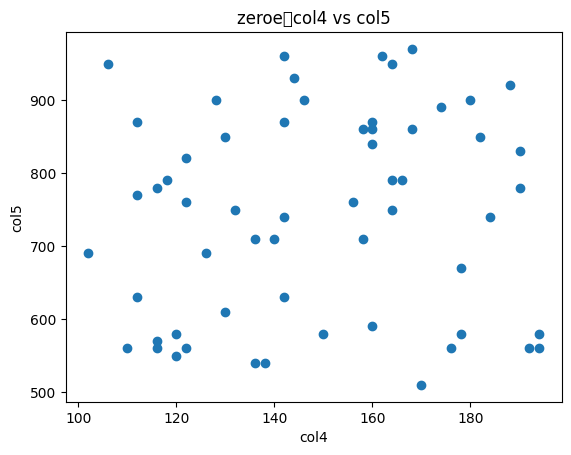

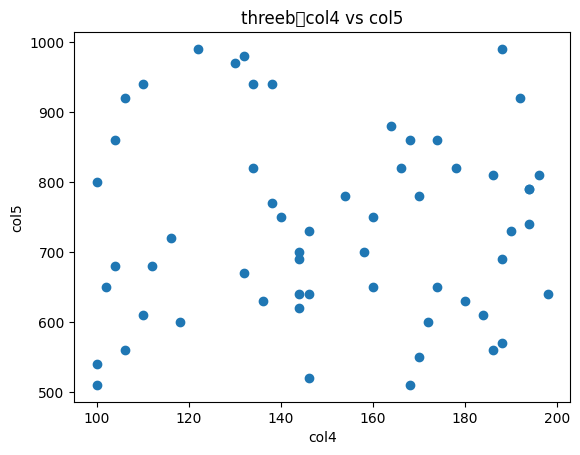

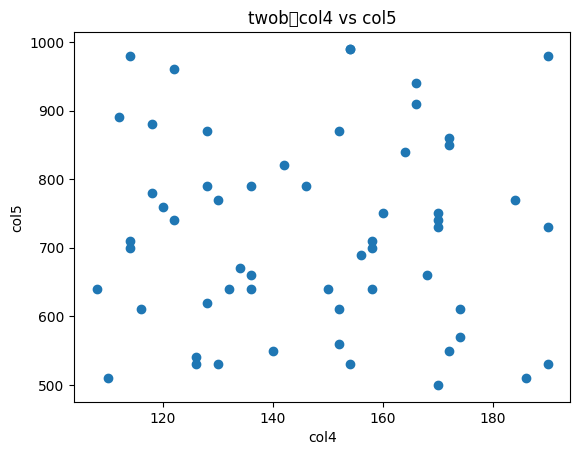

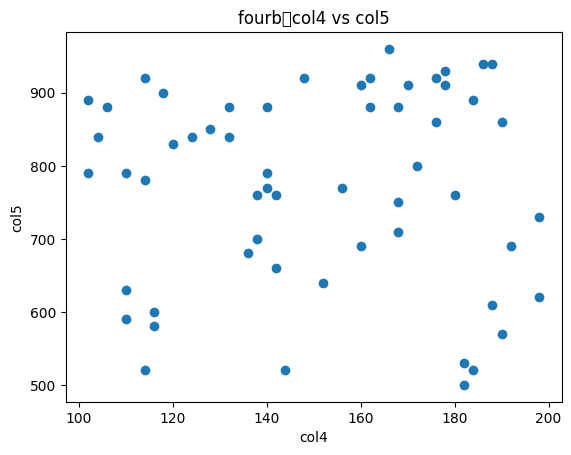

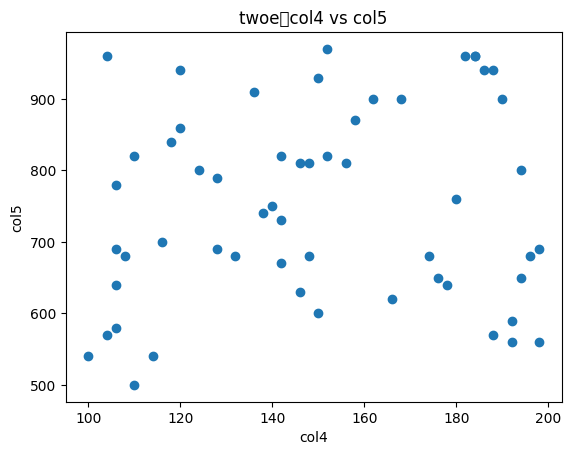

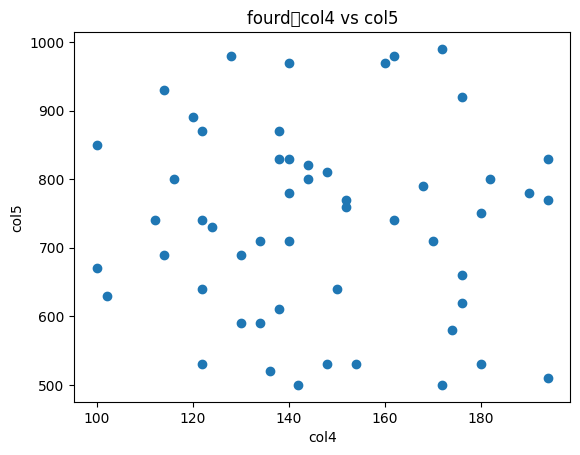

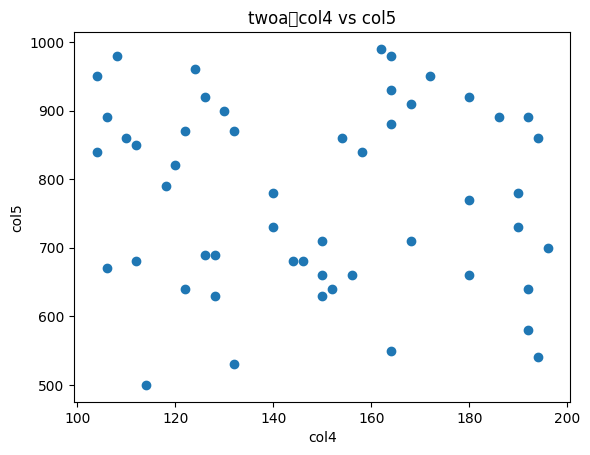

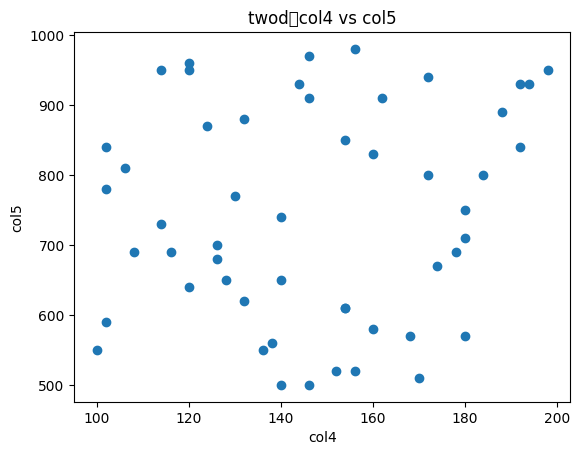

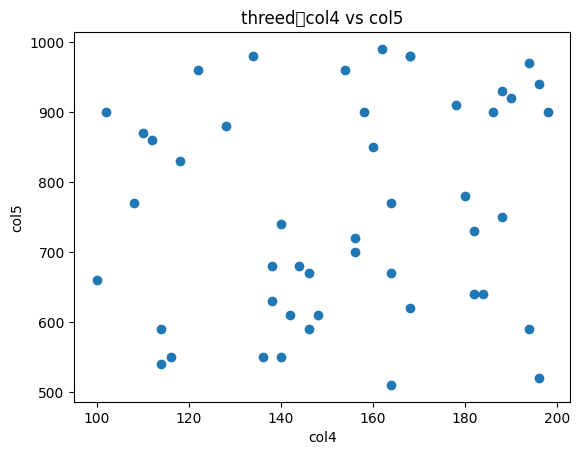

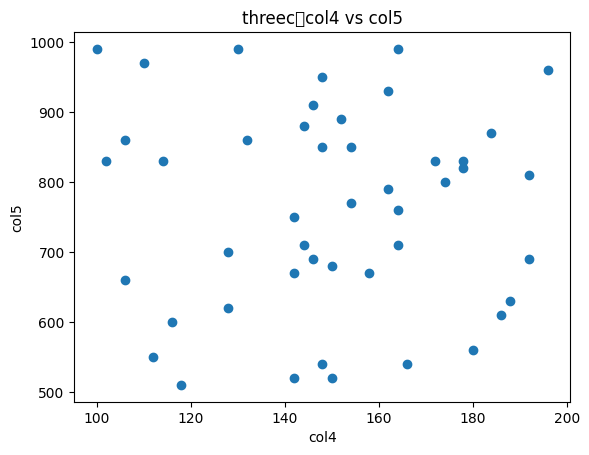

In [5]:
# グラフ作成(一つのグラフ上に出す)
df = create_df()

col1 = "col1"
col2 = "col2"

col_li = ["col1", "col2", "col3"]
to_remove = [col1, col2]
col3 = [i for i in col_li if i not in to_remove]

# 連結カラムが件数が多い組み合わせに並び替えたリスト作成
concat_col = f"{col1}_{col2}"
df[concat_col] = df[col1] + df[col2]
display(df.head())
df_agg = (
        pd.DataFrame(
        pd.DataFrame(df.groupby(concat_col).count())
        .rename(columns={col1:"件数"})
        .sort_values(by="件数", ascending=False)
        ["件数"]
        )
    )
display(df_agg.head())
# rows_li = list(df[concat_col].unique())
agg_rows_li = list(df_agg.index.unique())
# print(rows_li)
# print(agg_rows_li)
print(f"組み合わせの数:{len(agg_rows_li)}パターン")

for row in agg_rows_li: 
    attracted_df = df[df[concat_col] == row]
    plt.scatter(attracted_df["col4"], attracted_df["col5"])
    plt.xlabel("col4")
    plt.ylabel("col5")
    plt.title(f"{row}のcol4 vs col5")
    plt.show() # 別々に並べる場合はコメントアウトを外す